# Preparation

In [1]:
#mount
from google.colab import drive
drive.mount('/content/drive')
#gpu
!nvidia-smi
#home
import os
HOME = '/content/drive/MyDrive' #os.getcwd()
print(HOME)

#ultralytics-yolo
!pip install ultralytics==8.0.20
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

#sam
import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'
#%cd '/content/drive/MyDrive/flood/weights'
#!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

#visualization
!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-h9o1984e
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-h9o1984e
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36586 sha256=65419e51a056b56f0903a755347aa98973a2e161696ba665c7873028116c9010
  Stored in directory: /tmp/pip-ephem-wheel-cache-da85ffpo/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

# Detection
parameters: https://docs.ultralytics.com/modes/predict/#boxes

In [2]:
from ultralytics import YOLO
from IPython.display import display, Image
import numpy as np
#pt path
model = YOLO(f'/content/drive/MyDrive/flood_log/detection/yolov8_x_0.45/weights/best.pt')

# Segmentation

In [4]:
import torch
import cv2
import numpy as np
import os
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#model type
MODEL_TYPE = "vit_h"
#checkpoint path
HOME = '/content/drive/MyDrive'
CHECKPOINT_PATH = os.path.join(HOME, "flood/weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))
#model
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)
mask_generator = SamAutomaticMaskGenerator(sam)
mask_predictor = SamPredictor(sam)
#visualization
import supervision as sv
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

/content/drive/MyDrive/flood/weights/sam_vit_h_4b8939.pth ; exist: True


# flow

----------i: 0 -----------------
/content/drive/MyDrive/flood/data/huaiyuan_img/test/test1.jpg
----------j: 0 -----------------
masks: [[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]] 
 scores: [    0.97812     0.97788     0.96952]


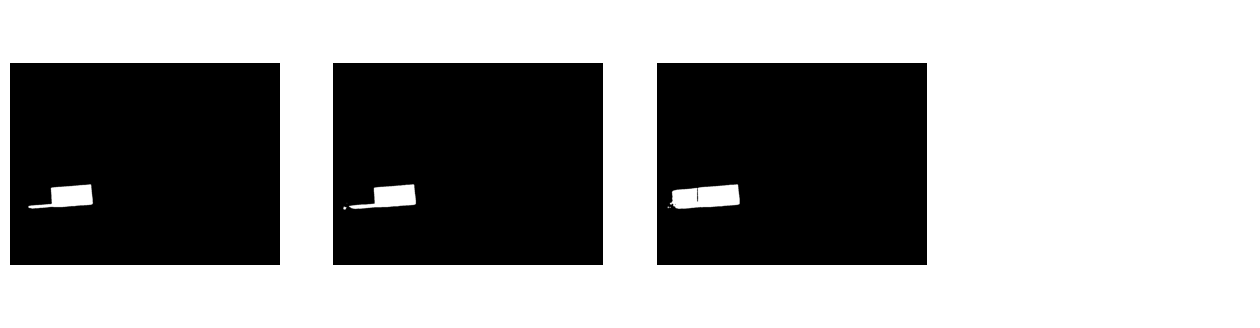

downedges: [[754, 219], [754, 220], [755, 203], [755, 204], [755, 205], [755, 206], [755, 207], [755, 208], [755, 209], [755, 210], [755, 211], [755, 212], [755, 213], [755, 214], [755, 215], [755, 216], [755, 217], [755, 218], [755, 219], [756, 191], [756, 192], [756, 193], [756, 194], [756, 195], [756, 196], [756, 197], [756, 198], [756, 199], [756, 200], [756, 201], [756, 202], [756, 203], [756, 204], [756, 205], [756, 206], [756, 207], [756, 208], [756, 209], [756, 210], [756, 211], [756, 212], [756, 213], [756, 214], [756, 215], [756, 216], [756, 438], [757, 181], [757, 182], [757, 183], [757, 184], [757, 185], [757, 186], [757, 187], [757, 188], [757, 189], [757, 190], [757, 191], [757, 192], [757, 193], [757, 194], [757, 195], [757, 196], [757, 197], [757, 198], [757, 199], [757, 200], [757, 436], [757, 437], [758, 171], [758, 172], [758, 173], [758, 174], [758, 175], [758, 176], [758, 177], [758, 178], [758, 179], [758, 180], [758, 181], [758, 182], [758, 183], [758, 184], [758

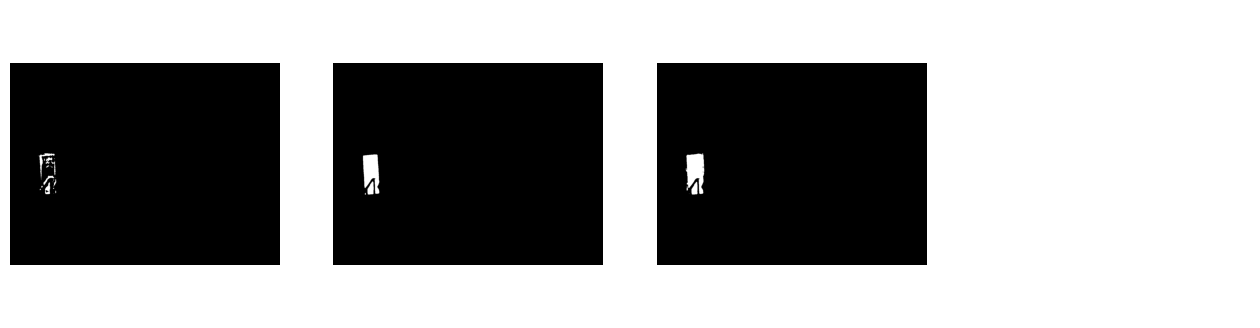

downedges: [[617, 215], [617, 216], [617, 217], [617, 218], [617, 219], [618, 212], [618, 213], [618, 214], [618, 215], [618, 216], [618, 217], [618, 218], [618, 219], [618, 220], [618, 221], [618, 222], [619, 210], [619, 211], [619, 212], [619, 222], [619, 223], [619, 224], [620, 209], [623, 224], [634, 211], [635, 211], [635, 212], [670, 170], [670, 171], [696, 172], [699, 240], [699, 241], [699, 242], [699, 243], [699, 244], [700, 227], [700, 228], [700, 229], [700, 230], [700, 231], [700, 232], [700, 233], [700, 234], [700, 235], [700, 236], [700, 237], [700, 238], [700, 239], [700, 240], [700, 241], [700, 242], [701, 228], [701, 229], [701, 230], [701, 231], [701, 232], [701, 233], [701, 234], [701, 235], [701, 236], [701, 237], [702, 213], [702, 214], [703, 200], [703, 201], [703, 202], [703, 203], [703, 204], [703, 205], [703, 206], [703, 207], [703, 208], [703, 209], [703, 210], [703, 211], [703, 212], [703, 213], [704, 187], [704, 188], [704, 189], [704, 190], [704, 191], [704

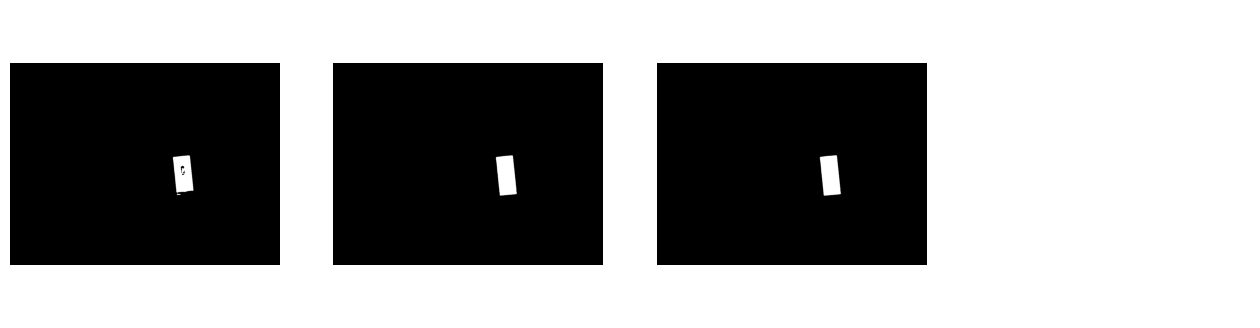

downedges: [[702, 974], [702, 975], [702, 976], [702, 977], [703, 966], [703, 967], [703, 968], [703, 969], [703, 970], [703, 971], [703, 972], [703, 973], [703, 974], [703, 975], [703, 976], [704, 955], [704, 956], [704, 957], [704, 958], [704, 959], [704, 960], [704, 961], [704, 962], [704, 963], [704, 964], [704, 965], [704, 966], [704, 967], [704, 968], [704, 969], [704, 970], [704, 971], [705, 942], [705, 943], [705, 944], [705, 945], [705, 946], [705, 947], [705, 948], [705, 949], [705, 950], [705, 951], [705, 952], [705, 953], [705, 954], [705, 955], [705, 956], [705, 957], [705, 958], [705, 959], [705, 960], [705, 961], [705, 962], [705, 963], [706, 931], [706, 932], [706, 933], [706, 934], [706, 935], [706, 936], [706, 937], [706, 938], [706, 939], [706, 940], [706, 941], [706, 942], [706, 943], [706, 944], [706, 945], [706, 946], [706, 947], [706, 948], [706, 949], [706, 950], [706, 951], [706, 952], [707, 919], [707, 920], [707, 921], [707, 922], [707, 923], [707, 924], [707

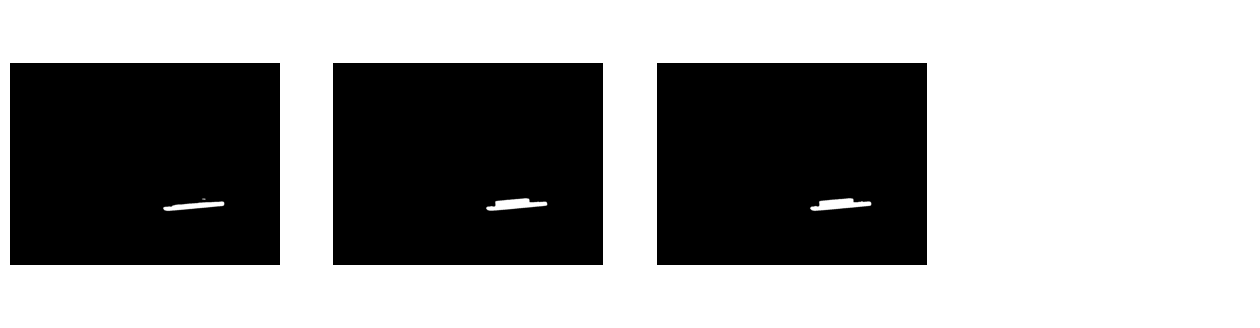

downedges: [[763, 1139], [764, 1134], [764, 1135], [764, 1136], [764, 1137], [764, 1138], [765, 846], [765, 1125], [765, 1126], [765, 1127], [765, 1128], [765, 1129], [765, 1130], [765, 1131], [765, 1132], [765, 1133], [765, 1134], [765, 1135], [765, 1136], [766, 841], [766, 842], [766, 843], [766, 844], [766, 845], [766, 846], [766, 847], [766, 848], [766, 849], [766, 850], [766, 1115], [766, 1116], [766, 1117], [766, 1118], [766, 1119], [766, 1120], [766, 1121], [766, 1122], [766, 1123], [766, 1124], [766, 1125], [766, 1126], [766, 1127], [766, 1128], [766, 1129], [766, 1130], [766, 1131], [767, 838], [767, 839], [767, 840], [767, 841], [767, 842], [767, 843], [767, 849], [767, 850], [767, 851], [767, 852], [767, 853], [767, 861], [767, 862], [767, 1104], [767, 1105], [767, 1106], [767, 1107], [767, 1108], [767, 1109], [767, 1110], [767, 1111], [767, 1112], [767, 1113], [767, 1114], [767, 1115], [767, 1116], [767, 1117], [767, 1118], [767, 1119], [767, 1120], [767, 1121], [767, 1122]

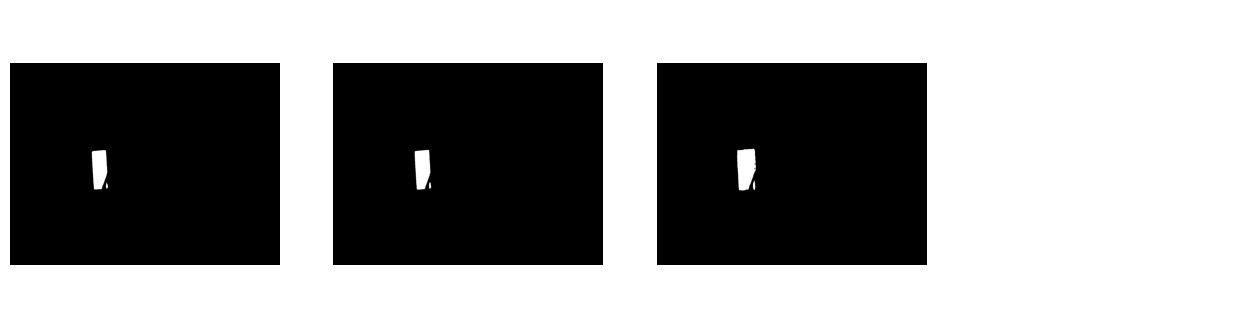

downedges: [[672, 517], [673, 515], [673, 516], [675, 487], [676, 470], [676, 471], [676, 472], [676, 473], [676, 474], [676, 475], [676, 476], [676, 477], [676, 478], [676, 479], [676, 480], [676, 481], [676, 482], [676, 483], [676, 484], [676, 485], [676, 486], [677, 450], [677, 451], [677, 456], [677, 457], [677, 458], [677, 459], [677, 460], [677, 461], [677, 462], [677, 463], [677, 464], [677, 465], [677, 466], [677, 467], [677, 468], [677, 469], [677, 470], [677, 471], [677, 472], [677, 473], [677, 474], [677, 475], [677, 476], [677, 477], [677, 478], [677, 479], [677, 480], [677, 481], [677, 482], [677, 483], [677, 484], [678, 451], [678, 452], [678, 453], [678, 454], [678, 455], [678, 456], [678, 457], [678, 458], [678, 459], [678, 460], [678, 461], [678, 462], [678, 463], [678, 464], [678, 465], [678, 466], [678, 467]]
upedges: [[468, 492], [468, 493], [468, 494], [468, 495], [468, 496], [468, 497], [468, 498], [468, 499], [468, 500], [468, 501], [468, 502], [468, 503], [468, 

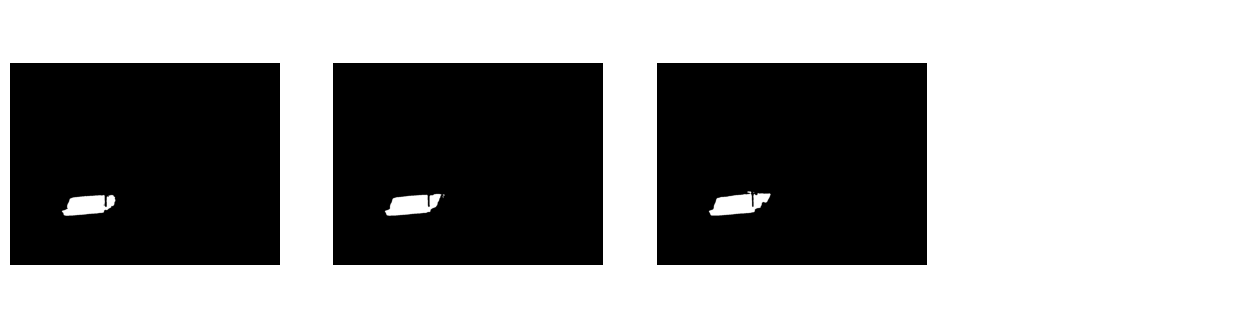

downedges: [[763, 552], [765, 543], [765, 544], [766, 542], [766, 543], [766, 544], [766, 545], [766, 546], [766, 547], [766, 548], [767, 547], [770, 509], [770, 510], [770, 511], [770, 512], [770, 513], [771, 509], [771, 510], [771, 511], [771, 512], [774, 537], [775, 535], [775, 536], [776, 533], [776, 534], [777, 531], [777, 532], [778, 529], [778, 530], [779, 528], [780, 306], [780, 526], [781, 303], [781, 304], [781, 305], [781, 525], [782, 301], [782, 302], [782, 303], [783, 300], [784, 298], [785, 296], [785, 297], [786, 293], [786, 294], [786, 295], [786, 508], [786, 509], [786, 510], [786, 511], [786, 518], [786, 519], [787, 291], [787, 292], [787, 293], [787, 506], [787, 507], [787, 512], [787, 513], [787, 514], [787, 515], [787, 516], [787, 517], [787, 518], [788, 286], [788, 287], [788, 288], [788, 289], [788, 290], [788, 504], [788, 505], [788, 514], [788, 515], [789, 282], [789, 283], [789, 284], [789, 285], [789, 286], [789, 287], [789, 288], [789, 503], [790, 280], [790

In [7]:
from torch._C import NoneType
import cv2
import os
import numpy as np
from PIL import Image, ImageDraw

#image path
imgfolder_path = '/content/drive/MyDrive/flood/data/huaiyuan_img/test/'
img_name = os.listdir(imgfolder_path)
OUTPUT_dir = '/content/drive/MyDrive/flood/data/test/'
TXT_dir = '/content/drive/MyDrive/flood/data/test/txt/'

#----------------flow begin--------------------
for i in range(len(img_name)):
  print('----------i:',i,'-----------------')
  IMAGE_PATH = os.path.join(imgfolder_path,img_name[i])
  print(IMAGE_PATH)

  ##detection
  det_results = model.predict(source=IMAGE_PATH, conf=0.5)
  for j in range(len(det_results[0].boxes)):
    print('----------j:',j,'-----------------')
    OUT_PATH = TXT_dir+img_name[i]+'_'+str(j)+'.txt'
    box = np.array([
        float(det_results[0].boxes.xyxy[j][0]),
        float(det_results[0].boxes.xyxy[j][1]),
        float(det_results[0].boxes.xyxy[j][2]),
        float(det_results[0].boxes.xyxy[j][3])
    ])
    classid = int(det_results[0].boxes.cls[j]) #得到class标识 0:basemnet 1:stoop 2:door
    image_bgr = cv2.imread(IMAGE_PATH)
    #print(image_bgr)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    mask_predictor.set_image(image_rgb)

    ##segmentation
    masks, scores, logits = mask_predictor.predict(
        box=box,
        multimask_output=True
    )
    print('masks:',masks,'\n scores:',scores)#,'\n logits:',logits)
    sv.plot_images_grid(
      images=masks,
      grid_size=(1, 4),
      size=(16, 4)
    )

    ##edge detection
    #find the mask of the highest score
    index = np.where(scores==np.max(scores))[0][0] #scores.index(max(scores))
    #print('index:',index)
    img = masks[index].astype(np.uint8)
    #only horizontal lines
    lap = cv2.Sobel(img, cv2.CV_64F, 0, 1)
    #abs
    lap = np.uint8(np.absolute(lap))
    #filter inclined lines
    edges=[] 
    for m in range(lap.shape[0]):
      for n in range(lap.shape[1]):
        #if(int(lap[i][j])!=0): print(lap[i][j])
        if(lap[m][n]>=4):
          lap[m][n] = 1 #1:basemnet 2:stoop 3:door
          edges.append([m,n])
        else:
          lap[m][n] = 0
    #up/down
    sorted (edges, key = lambda x:x[1])#up
    ymax = edges[-1][0] #[y,x]
    ymin = edges[0][0]
    ymiddle = (ymax+ymin)/2
    #print(ymiddle)
    upline = np.zeros_like(lap)
    downline = np.zeros_like(lap)
    upedges = []
    downedges = []
    for edge in edges:
      if (edge[0] >= ymiddle):
        downedges.append(edge)
        downline[edge[0]][edge[1]]=1
      else:
        upedges.append(edge)
        upline[edge[0]][edge[1]]=1

    print('downedges:',downedges)
    print('upedges:',upedges)
    #print(lap)

    ##hough
    uplines = cv2.HoughLinesP(image=upline, rho=1, theta=np.pi/180, threshold=20, minLineLength=50, maxLineGap=50)
    downlines = cv2.HoughLinesP(image=downline, rho=1, theta=np.pi/180, threshold=20, minLineLength=50, maxLineGap=50)
  
    #find the maxmum edge line
    def maxline(lines):
      if lines is not None:
        line = lines[0]
        line_len = np.square(line[0][0]-line[0][2]) + np.square(line[0][1]-line[0][3])
        for linex in lines:
          linex_len = np.square(linex[0][0]-linex[0][2]) + np.square(linex[0][1]-linex[0][3])
          if (linex_len > line_len):
            line = linex
            line_len = linex_len
        return line
      else:
        return None
    upline1 = maxline(uplines)
    downline1 = maxline(downlines)

    print('upline:',upline1)
    print('downline:',downline1)

    ##visualization edge
    image = Image.open(IMAGE_PATH)
    draw = ImageDraw.Draw(image)

    # upline
    if uplines is not None:
      for g in range(len(upline1)):
        x1 = upline1[g][0]
        y1 = upline1[g][1]
        x2 = upline1[g][2]
        y2 = upline1[g][3]
        draw.line((x1,y1,x2,y2),fill ="red", width = 10)

    # downline
    if downlines is not None:
      for g in range(len(downline1)):
        x1 = downline1[g][0]
        y1 = downline1[g][1]
        x2 = downline1[g][2]
        y2 = downline1[g][3]
        draw.line((x1,y1,x2,y2),fill ="green", width = 10)


    ## save
    if(uplines is not None or downlines is not None):
      OUTPUT_PATH = OUTPUT_dir + img_name[i][:-4] + '_' + str(j) + '.jpg'
      image.save(OUTPUT_PATH)
      image.show()

    ## txt
    with open(OUT_PATH,"w") as file:
      file.write(str(classid)+'_upline: ')
      file.write(str(upline1))
      file.write('\n')
      file.write(str(classid)+'_downline: ')
      file.write(str(downline1))